In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
sms = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


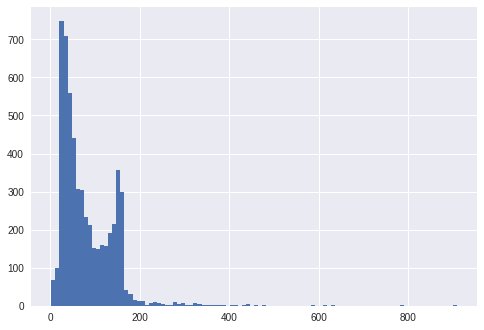

In [6]:
sms['length'].hist(bins=100)
plt.show()

In [7]:
sms['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
sms[sms['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [9]:
sms[sms['length'] == 910]['message'].values[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

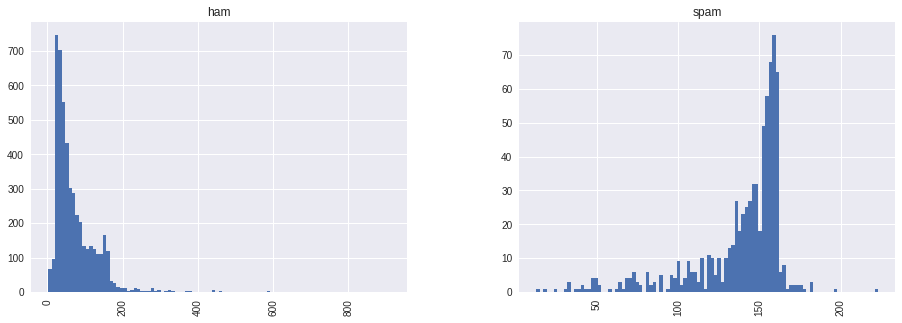

In [10]:
sms.hist(column='length', by='label', figsize=(15,5), bins=100)
plt.show()

In [11]:
nltk_english_stopwords = stopwords.words('english')

def my_tokenizer(message):
    message = [char for char in message if char not in string.punctuation]  # remove punctuation
    message = ''.join(message)
    message = message.lower()  # downcase
    message = [word for word in message.split() if word not in nltk_english_stopwords]  # remove stopwords
    return message

In [12]:
sms['message'].head().apply(my_tokenizer)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [13]:
cv = CountVectorizer(analyzer=my_tokenizer)
cv

CountVectorizer(analyzer=<function my_tokenizer at 0x7fd69e1e1158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [14]:
cv.fit(sms['message'])

CountVectorizer(analyzer=<function my_tokenizer at 0x7fd69e1e1158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [39]:
print('Words indices:', cv.vocabulary_)

Words indices: {'go': 3786, 'jurong': 4696, 'point': 6445, 'crazy': 2485, 'available': 1389, 'bugis': 1860, 'n': 5686, 'great': 3883, 'world': 9208, 'la': 4858, 'e': 3016, 'buffet': 1858, 'cine': 2200, 'got': 3843, 'amore': 1156, 'wat': 8969, 'ok': 6006, 'lar': 4897, 'joking': 4664, 'wif': 9103, 'u': 8626, 'oni': 6038, 'free': 3571, 'entry': 3152, '2': 416, 'wkly': 9160, 'comp': 2316, 'win': 9117, 'fa': 3290, 'cup': 2541, 'final': 3415, 'tkts': 8398, '21st': 436, 'may': 5345, '2005': 423, 'text': 8233, '87121': 849, 'receive': 6848, 'questionstd': 6738, 'txt': 8610, 'ratetcs': 6791, 'apply': 1242, '08452810075over18s': 72, 'dun': 3002, 'say': 7208, 'early': 3023, 'hor': 4219, 'c': 1910, 'already': 1129, 'nah': 5693, 'dont': 2907, 'think': 8309, 'goes': 3800, 'usf': 8760, 'lives': 5060, 'around': 1293, 'though': 8328, 'freemsg': 3579, 'hey': 4114, 'darling': 2605, '3': 527, 'weeks': 9023, 'word': 9194, 'back': 1442, 'id': 4340, 'like': 5010, 'fun': 3646, 'still': 7875, 'tb': 8163, 'xxx'

In [16]:
len(cv.vocabulary_)

9530

In [17]:
cv.get_feature_names()

['0',
 '008704050406',
 '0089my',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '084528

In [18]:
bow_cv = cv.transform(sms['message'])
bow_cv

<5572x9530 sparse matrix of type '<class 'numpy.int64'>'
	with 50101 stored elements in Compressed Sparse Row format>

In [19]:
bow_cv.shape

(5572, 9530)

In [20]:
print('Non zero entries in bag of words spare matrix:', bow_cv.nnz)

Non zero entries in bag of words spare matrix: 50101


In [22]:
sparcity = (100.0 * bow_cv.nnz / (bow_cv.shape[0] * bow_cv.shape[1]))
print('Sparcity:', sparcity)

Sparcity: 0.09435010459281869


In [23]:
print('Fourth sms:', sms.iloc[3]['message'])

Fourth sms: U dun say so early hor... U c already then say...


In [57]:
print('Fourth sms word indices with word counts:\n{}'.format(bow_cv[3]))

Fourth sms word indices with word counts:
  (0, 1129)	1
  (0, 1910)	1
  (0, 3002)	1
  (0, 3023)	1
  (0, 4219)	1
  (0, 7208)	2
  (0, 8626)	2


In [60]:
print('Fourth sms words with word counts:')
for word_index in bow_cv[3].indices:
    print(cv.get_feature_names()[word_index], '\t', bow_cv[3, word_index])

Fourth sms words with word counts:
already 	 1
c 	 1
dun 	 1
early 	 1
hor 	 1
say 	 2
u 	 2


In [27]:
tfidf = TfidfTransformer()
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [28]:
tfidf.fit(bow_cv)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [29]:
bow_tfidf = tfidf.transform(bow_cv)
bow_tfidf

<5572x9530 sparse matrix of type '<class 'numpy.float64'>'
	with 50101 stored elements in Compressed Sparse Row format>

In [30]:
print('Fourth sms with term frequency inverse document frequency:\n{}'.format(bow_tfidf[3]))

Fourth sms with term frequency inverse document frequency:
  (0, 8626)	0.319491587697
  (0, 7208)	0.559700094048
  (0, 4219)	0.464527625007
  (0, 3023)	0.335574365269
  (0, 3002)	0.309125465389
  (0, 1910)	0.287037034059
  (0, 1129)	0.279850047024


In [61]:
print('Fourth sms words with TF-IDF:')
for word_index in bow_tfidf[3].indices:
    print(cv.get_feature_names()[word_index], '\t', bow_tfidf[3, word_index])

Fourth sms words with TF-IDF:
u 	 0.319491587697
say 	 0.559700094048
hor 	 0.464527625007
early 	 0.335574365269
dun 	 0.309125465389
c 	 0.287037034059
already 	 0.279850047024


In [48]:
print('IDF of word "already":', tfidf.idf_[cv.vocabulary_['already']])

IDF of word "already": 5.13705241784


In [100]:
X = bow_tfidf
y = sms['label']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape[0], X_test.shape[0]

(3900, 1672)

In [102]:
model = MultinomialNB()

In [103]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
y_pred = model.predict(X_test)

In [105]:
accuracy_score(y_pred, y_test)

0.95633971291866027

TODO:
use pipeline